In [250]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string
from langdetect import detect
from tqdm import tqdm

%matplotlib inline

In [263]:
local_path = 'D:Datasets/380000-lyrics-from-metrolyrics/lyrics.csv'

df = pd.read_csv(local_path, index_col=0)
df.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [264]:
len(df)

362237

In [268]:
df.isna().sum()

song          2
year          0
artist        0
genre         0
lyrics    95680
dtype: int64

### Drop entries with at least one NaN value

In [252]:
df.dropna(how='any',axis=0, inplace=True)

### Genre distribution

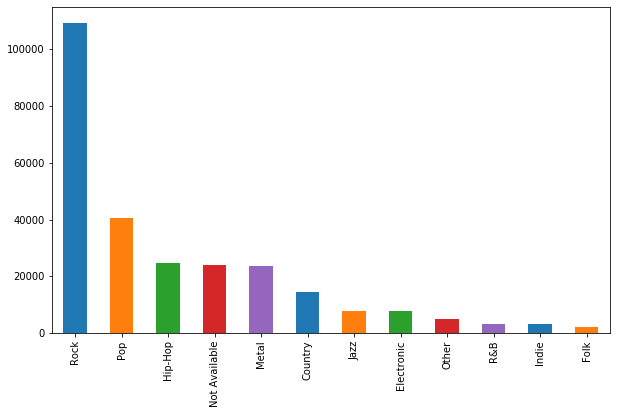

In [253]:
plt.figure(figsize=(10,6))
df['genre'].value_counts().plot.bar(color=['C0', 'C1', 'C2', 'C3', 'C4'])

### Dropping Not Available, Other, Indie & Folk

Dropping Indie and folk because they have the smallest number of songs in the dataset. If we didn't do that and we wanted to get an equal sample for every genre we would have ~ 20,000 rows, by dropping Indie and Folk, the next genre with the smallest number of songs is R&B with 3401 songs. So now we have around 27,000 entries, which is a 30% increase. Also, Indie is a vague genre in terms of musical quality, it refers more to the way the music is produced. Folk is a genre which is represented under the Country genre.

In [254]:
df.drop(df[df.genre == "Other"].index, inplace=True)
df.drop(df[df.genre == "Not Available"].index, inplace=True)
df.drop(df[df.genre == "Indie"].index, inplace=True)
df.drop(df[df.genre == "Folk"].index, inplace=True)
df.shape

(232034, 5)

### Word count statistics per genre

In [255]:
df['word_count'] = df['lyrics'].str.split().str.len()
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14387.0,186.086397,82.999049,1.0,128.0,171.0,231.0,1366.0
Electronic,7966.0,193.376475,138.816594,1.0,100.0,170.0,260.0,1920.0
Hip-Hop,24850.0,489.962052,238.627250,1.0,340.0,485.0,629.0,8195.0
Jazz,7970.0,172.067252,97.430118,1.0,108.0,152.0,215.0,1040.0
Metal,23759.0,169.068774,112.809568,1.0,100.0,152.0,217.0,2423.0
Pop,40466.0,245.741264,128.698319,1.0,157.0,224.0,311.0,1704.0
R&B,3401.0,224.931785,120.049328,1.0,142.0,204.0,281.0,1440.0
Rock,109235.0,190.704701,105.878550,1.0,125.0,177.0,241.0,6232.0


Even the simplest songs have more than one word, so let's see what's the deal with that

In [256]:
df.loc[df['word_count'] == 1]

,song,year,artist,genre,lyrics,word_count
index,,,,,,
420,dying-sun,2011,demonaz,Metal,[Instrumental],1
1410,curtain-call,2011,brandi-carlile,Country,INSTRUMENTAL,1
1841,providence,2007,dreadful-shadows,Rock,[Instrumental],1
1858,prelude,2007,dreadful-shadows,Rock,[Instrumental],1
2209,blood-children-an-introduction,2007,atreyu,Rock,[Instrumental],1
...,...,...,...,...,...,...
360688,green-theme,2012,baroness,Rock,INSTRUMENTAL,1
361097,the-journey-instrumental,2008,frida,Pop,INSTRUMENTAL,1
361730,instrumental,2012,dean-martin,Jazz,INSTRUMENTAL,1


Because all of the songs that have one word are obviously instrumental songs, we drop them

In [257]:
df = df[df['word_count'] != 1]
print(df.shape)
df['word_count'].groupby(df['genre']).describe(percentiles=[.01, .03, .25, .5, .75, 1])

(229002, 6)


,count,mean,std,min,1%,3%,25%,50%,75%,100%,max
genre,,,,,,,,,,,
Country,14323.0,186.913426,82.254845,3.0,59.00,78.0,129.0,171.0,231.0,1366.0,1366.0
Electronic,7620.0,202.111680,135.602990,2.0,7.00,22.0,110.0,177.0,264.0,1920.0,1920.0
Hip-Hop,24765.0,491.640299,237.307748,2.0,22.00,70.0,341.0,486.0,629.0,8195.0,8195.0
Jazz,7825.0,175.237188,95.478588,2.0,35.24,58.0,110.0,153.0,216.0,1040.0,1040.0
Metal,22995.0,174.652794,110.359008,2.0,6.00,28.0,105.0,155.0,220.0,2423.0,2423.0
Pop,40263.0,246.975213,127.840684,2.0,36.00,70.0,158.0,225.0,311.0,1704.0,1704.0
R&B,3391.0,225.592156,119.607676,2.0,45.90,71.0,142.0,204.0,281.5,1440.0,1440.0
Rock,107820.0,193.194333,104.301925,2.0,19.19,50.0,127.0,178.0,242.0,6232.0,6232.0


As we investigate further, it is clear that lyrics that have a word count which corresponds to the bottom 3% of the word count distribution are also unusable so we decide to drop them too. Also, after inspecting the top outliers we decide to drop them too. Having in mind that each genre has a different word count distribution, we avoid choosing a specific cutoff value and instead calculate the percentiles per genre. 

In [258]:
def cut_percentile(df, bottom_percentile=0.03, top_percentile=0.97):

    return df[df.word_count>=df.groupby('genre').word_count.transform('quantile', bottom_percentile)]
    return df[df.word_count<=df.groupby('genre').word_count.transform('quantile', top_percentile)]

In [259]:
df = cut_percentile(df)
df.head()

,song,year,artist,genre,lyrics,word_count
index,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",433
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",258
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,170
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",522
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [260]:
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,13907.0,190.796793,80.220081,78.0,132.0,174.0,233.0,1366.0
Electronic,7392.0,208.009470,133.385133,22.0,115.0,181.0,267.0,1920.0
Hip-Hop,24025.0,505.742893,226.678784,70.0,356.0,494.0,636.0,8195.0
Jazz,7605.0,179.182774,93.911522,58.0,113.0,157.0,218.0,1040.0
Metal,22322.0,179.551787,108.278358,28.0,109.0,158.0,222.0,2423.0
Pop,39074.0,253.161028,124.635254,70.0,164.0,229.0,315.0,1704.0
R&B,3290.0,231.010334,117.250571,71.0,148.0,207.0,284.0,1440.0
Rock,104603.0,198.308280,101.639619,50.0,131.0,182.0,245.0,6232.0


### Keep only songs in English

In [234]:
languages = dict()

for index, row in tqdm(df.iterrows()):
    try: 
        lang = detect(row['lyrics'])
        if lang != 'en':
            if lang not in languages.keys():
                languages[lang] = 1
            else:
                languages[lang] +=1
            df.drop(index=index, inplace=True)
    except:
        df.drop(index=index, inplace=True)



0it [00:00, ?it/s]

2it [00:00, 18.86it/s]

13it [00:00, 25.03it/s]

21it [00:00, 31.50it/s]

26it [00:00, 31.13it/s]

32it [00:00, 34.74it/s]

37it [00:00, 37.98it/s]

47it [00:00, 43.84it/s]

53it [00:01, 39.11it/s]

59it [00:01, 43.11it/s]

66it [00:01, 48.42it/s]

72it [00:01, 46.39it/s]

78it [00:01, 49.53it/s]

86it [00:01, 55.92it/s]

93it [00:01, 58.32it/s]

100it [00:01, 54.90it/s]

110it [00:01, 62.30it/s]

119it [00:02, 68.01it/s]

127it [00:02, 69.54it/s]

135it [00:02, 70.47it/s]

143it [00:02, 71.51it/s]

151it [00:02, 73.05it/s]

160it [00:02, 75.48it/s]

169it [00:02, 76.49it/s]

177it [00:02, 74.68it/s]

185it [00:02, 66.68it/s]

194it [00:03, 70.77it/s]

202it [00:03, 59.42it/s]

209it [00:03, 61.91it/s]

220it [00:03, 70.30it/s]

230it [00:03, 76.82it/s]

239it [00:03, 76.66it/s]

248it [00:03, 73.90it/s]

256it [00:03, 71.19it/s]

264it [00:04, 70.50it/s]

273it [00:04, 75.03it/s]

282it [00:04, 76.94it/s]

290it [00:04, 76.06it/s]

298it [00:04, 75.67it/s]

306it

6078it [01:26, 106.35it/s]

6089it [01:26, 98.21it/s] 

6100it [01:26, 100.09it/s]

6111it [01:26, 102.86it/s]

6122it [01:26, 88.45it/s] 

6132it [01:27, 77.92it/s]

6146it [01:27, 89.19it/s]

6156it [01:27, 91.42it/s]

6171it [01:27, 102.91it/s]

6184it [01:27, 107.87it/s]

6196it [01:27, 110.02it/s]

6210it [01:27, 116.68it/s]

6227it [01:27, 127.36it/s]

6241it [01:27, 126.64it/s]

6255it [01:28, 129.28it/s]

6270it [01:28, 132.02it/s]

6286it [01:28, 138.25it/s]

6301it [01:28, 140.38it/s]

6316it [01:28, 141.51it/s]

6331it [01:28, 135.75it/s]

6346it [01:28, 138.96it/s]

6361it [01:28, 141.29it/s]

6377it [01:28, 144.84it/s]

6392it [01:29, 143.01it/s]

6407it [01:29, 142.95it/s]

6422it [01:29, 143.33it/s]

6437it [01:29, 140.00it/s]

6452it [01:29, 135.49it/s]

6466it [01:29, 136.03it/s]

6480it [01:29, 128.50it/s]

6493it [01:29, 123.79it/s]

6506it [01:29, 120.03it/s]

6519it [01:30, 121.14it/s]

6533it [01:30, 110.66it/s]

6545it [01:30, 40.57it/s] 

6554it [01:31, 26.39it/

12198it [02:50, 27.19it/s]

12207it [02:50, 34.38it/s]

12222it [02:50, 44.53it/s]

12235it [02:51, 55.18it/s]

12250it [02:51, 67.73it/s]

12263it [02:51, 71.18it/s]

12274it [02:52, 36.46it/s]

12282it [02:52, 27.30it/s]

12288it [02:52, 23.15it/s]

12293it [02:53, 21.07it/s]

12297it [02:53, 19.55it/s]

12301it [02:53, 18.18it/s]

12304it [02:53, 17.70it/s]

12307it [02:53, 17.35it/s]

12310it [02:54, 17.43it/s]

12313it [02:54, 16.71it/s]

12315it [02:54, 16.49it/s]

12317it [02:54, 16.71it/s]

12319it [02:54, 16.70it/s]

12321it [02:54, 16.90it/s]

12323it [02:54, 17.04it/s]

12325it [02:55, 17.06it/s]

12327it [02:55, 17.02it/s]

12329it [02:55, 16.92it/s]

12331it [02:55, 16.93it/s]

12333it [02:55, 16.47it/s]

12335it [02:55, 15.07it/s]

12337it [02:55, 14.05it/s]

12339it [02:55, 14.74it/s]

12341it [02:56, 15.34it/s]

12343it [02:56, 15.72it/s]

12345it [02:56, 15.91it/s]

12347it [02:56, 16.17it/s]

12349it [02:56, 16.36it/s]

12362it [02:56, 22.10it/s]

12372it [02:56, 28.6

18337it [04:08, 90.03it/s] 

18348it [04:08, 82.93it/s]

18360it [04:08, 83.14it/s]

18369it [04:08, 46.69it/s]

18376it [04:09, 29.84it/s]

18382it [04:09, 27.80it/s]

18387it [04:09, 31.41it/s]

18392it [04:09, 31.90it/s]

18402it [04:09, 39.47it/s]

18413it [04:09, 48.09it/s]

18426it [04:10, 58.66it/s]

18443it [04:10, 72.26it/s]

18454it [04:10, 80.03it/s]

18465it [04:10, 81.35it/s]

18478it [04:10, 90.48it/s]

18491it [04:10, 97.99it/s]

18503it [04:10, 101.85it/s]

18515it [04:10, 105.01it/s]

18529it [04:10, 112.70it/s]

18542it [04:11, 117.07it/s]

18555it [04:11, 120.00it/s]

18568it [04:11, 113.80it/s]

18580it [04:11, 110.48it/s]

18592it [04:11, 105.70it/s]

18603it [04:11, 97.05it/s] 

18613it [04:11, 96.50it/s]

18623it [04:11, 92.64it/s]

18633it [04:12, 88.45it/s]

18643it [04:12, 88.23it/s]

18657it [04:12, 99.24it/s]

18674it [04:12, 99.65it/s]

18688it [04:12, 107.06it/s]

18702it [04:12, 114.35it/s]

18714it [04:12, 109.93it/s]

18726it [04:12, 108.21it/s]

18738i

24605it [05:26, 19.17it/s]

24608it [05:27, 18.41it/s]

24611it [05:27, 17.69it/s]

24614it [05:27, 18.88it/s]

24625it [05:27, 25.04it/s]

24634it [05:27, 31.13it/s]

24640it [05:28, 24.34it/s]

24645it [05:28, 19.90it/s]

24649it [05:28, 17.97it/s]

24652it [05:28, 19.40it/s]

24658it [05:28, 24.08it/s]

24666it [05:29, 30.43it/s]

24680it [05:29, 39.53it/s]

24691it [05:29, 48.61it/s]

24704it [05:29, 59.85it/s]

24717it [05:29, 71.18it/s]

24729it [05:29, 79.94it/s]

24740it [05:29, 85.06it/s]

24752it [05:29, 91.71it/s]

24766it [05:29, 101.85it/s]

24778it [05:29, 93.69it/s] 

24791it [05:30, 100.83it/s]

24803it [05:30, 103.44it/s]

24815it [05:30, 107.04it/s]

24827it [05:30, 109.12it/s]

24841it [05:30, 114.84it/s]

24854it [05:30, 116.05it/s]

24866it [05:30, 113.95it/s]

24879it [05:30, 117.37it/s]

24891it [05:30, 115.42it/s]

24905it [05:31, 120.27it/s]

24918it [05:31, 118.99it/s]

24931it [05:31, 121.41it/s]

24944it [05:31, 123.16it/s]

24958it [05:31, 127.06it/s]

2497

30941it [06:44, 110.19it/s]

30955it [06:44, 111.53it/s]

30967it [06:44, 110.18it/s]

30979it [06:44, 112.62it/s]

30992it [06:44, 114.84it/s]

31004it [06:45, 109.95it/s]

31016it [06:45, 97.17it/s] 

31027it [06:45, 87.27it/s]

31037it [06:45, 74.02it/s]

31049it [06:45, 83.28it/s]

31059it [06:45, 83.09it/s]

31070it [06:45, 89.45it/s]

31081it [06:45, 93.07it/s]

31091it [06:46, 65.53it/s]

31105it [06:46, 76.56it/s]

31116it [06:46, 84.24it/s]

31128it [06:46, 91.66it/s]

31139it [06:46, 68.92it/s]

31148it [06:46, 68.39it/s]

31162it [06:47, 79.95it/s]

31172it [06:47, 77.37it/s]

31185it [06:47, 87.53it/s]

31197it [06:47, 94.14it/s]

31209it [06:47, 100.15it/s]

31220it [06:47, 76.67it/s] 

31233it [06:47, 86.73it/s]

31247it [06:47, 94.34it/s]

31258it [06:48, 82.02it/s]

31268it [06:48, 82.82it/s]

31283it [06:48, 94.58it/s]

31296it [06:48, 102.76it/s]

31310it [06:48, 99.31it/s] 

31323it [06:48, 106.62it/s]

31335it [06:48, 108.22it/s]

31347it [06:48, 104.78it/s]

31359i

35266it [08:10, 58.05it/s]

35273it [08:10, 50.25it/s]

35279it [08:10, 46.77it/s]

35286it [08:10, 51.03it/s]

35292it [08:10, 48.74it/s]

35298it [08:10, 44.03it/s]

35303it [08:10, 43.18it/s]

35310it [08:11, 48.69it/s]

35316it [08:11, 51.61it/s]

35324it [08:11, 56.06it/s]

35332it [08:11, 61.16it/s]

35339it [08:11, 57.75it/s]

35346it [08:11, 56.38it/s]

35352it [08:11, 52.59it/s]

35358it [08:11, 53.02it/s]

35364it [08:11, 52.49it/s]

35370it [08:12, 52.12it/s]

35377it [08:12, 55.11it/s]

35384it [08:12, 57.42it/s]

35392it [08:12, 61.57it/s]

35399it [08:12, 63.19it/s]

35406it [08:12, 62.47it/s]

35415it [08:12, 66.94it/s]

35424it [08:12, 71.31it/s]

35432it [08:12, 70.59it/s]

35440it [08:13, 60.96it/s]

35447it [08:13, 54.78it/s]

35453it [08:13, 53.39it/s]

35461it [08:13, 58.02it/s]

35468it [08:13, 57.97it/s]

35475it [08:13, 59.41it/s]

35482it [08:13, 54.78it/s]

35489it [08:14, 52.42it/s]

35495it [08:14, 45.65it/s]

35500it [08:14, 25.86it/s]

35504it [08:14, 20.6

40578it [09:29, 95.74it/s] 

40589it [09:29, 43.39it/s]

40597it [09:29, 49.36it/s]

40608it [09:30, 56.68it/s]

40617it [09:30, 43.44it/s]

40634it [09:30, 55.77it/s]

40649it [09:30, 68.72it/s]

40664it [09:30, 81.00it/s]

40678it [09:30, 92.17it/s]

40692it [09:30, 101.80it/s]

40705it [09:31, 99.62it/s] 

40721it [09:31, 112.11it/s]

40736it [09:31, 119.27it/s]

40750it [09:31, 120.31it/s]

40763it [09:31, 122.38it/s]

40778it [09:31, 129.20it/s]

40793it [09:31, 134.07it/s]

40809it [09:31, 139.09it/s]

40824it [09:31, 141.40it/s]

40840it [09:31, 146.09it/s]

40856it [09:32, 148.34it/s]

40874it [09:32, 154.59it/s]

40890it [09:32, 120.52it/s]

40906it [09:32, 128.90it/s]

40920it [09:32, 102.25it/s]

40932it [09:32, 103.67it/s]

40949it [09:32, 116.20it/s]

40962it [09:33, 118.38it/s]

40975it [09:33, 115.48it/s]

40988it [09:33, 106.56it/s]

41000it [09:33, 98.34it/s] 

41011it [09:33, 93.07it/s]

41021it [09:33, 92.15it/s]

41032it [09:33, 85.36it/s]

41046it [09:33, 96.48it/s

47471it [10:53, 81.66it/s]

47488it [10:53, 96.09it/s]

47501it [10:53, 94.27it/s]

47513it [10:53, 72.33it/s]

47524it [10:54, 80.26it/s]

47537it [10:54, 89.36it/s]

47548it [10:54, 92.53it/s]

47559it [10:54, 96.15it/s]

47573it [10:54, 103.76it/s]

47585it [10:55, 46.25it/s] 

47594it [10:55, 34.68it/s]

47601it [10:55, 27.68it/s]

47607it [10:56, 24.31it/s]

47613it [10:56, 29.50it/s]

47618it [10:56, 25.78it/s]

47622it [10:56, 22.60it/s]

47626it [10:56, 22.00it/s]

47629it [10:57, 22.77it/s]

47632it [10:57, 22.15it/s]

47635it [10:57, 20.97it/s]

47638it [10:57, 19.38it/s]

47641it [10:57, 20.11it/s]

47650it [10:57, 26.13it/s]

47662it [10:57, 34.03it/s]

47674it [10:57, 43.25it/s]

47688it [10:58, 54.18it/s]

47698it [10:58, 58.93it/s]

47710it [10:58, 69.55it/s]

47725it [10:58, 82.07it/s]

47737it [10:58, 88.07it/s]

47751it [10:58, 98.68it/s]

47766it [10:58, 109.25it/s]

47782it [10:58, 119.91it/s]

47799it [10:58, 130.63it/s]

47814it [10:59, 125.66it/s]

47828it [10:59

54609it [12:12, 122.83it/s]

54622it [12:12, 121.04it/s]

54637it [12:12, 127.84it/s]

54651it [12:12, 126.63it/s]

54664it [12:12, 126.12it/s]

54678it [12:12, 129.63it/s]

54692it [12:12, 124.11it/s]

54705it [12:13, 80.49it/s] 

54719it [12:13, 92.07it/s]

54734it [12:13, 101.59it/s]

54746it [12:13, 90.17it/s] 

54761it [12:13, 100.98it/s]

54773it [12:14, 50.36it/s] 

54782it [12:14, 36.63it/s]

54797it [12:14, 47.28it/s]

54812it [12:14, 59.08it/s]

54825it [12:14, 70.42it/s]

54839it [12:14, 82.61it/s]

54854it [12:15, 93.86it/s]

54870it [12:15, 107.15it/s]

54887it [12:15, 120.01it/s]

54906it [12:15, 134.06it/s]

54925it [12:15, 144.70it/s]

54946it [12:15, 157.78it/s]

54964it [12:16, 60.72it/s] 

54977it [12:17, 34.57it/s]

54987it [12:17, 26.60it/s]

54995it [12:18, 24.18it/s]

55010it [12:18, 32.31it/s]

55026it [12:18, 42.35it/s]

55038it [12:18, 50.82it/s]

55049it [12:18, 59.71it/s]

55064it [12:18, 72.55it/s]

55080it [12:18, 85.94it/s]

55093it [12:18, 93.00it/s]

55

62084it [13:31, 138.27it/s]

62099it [13:32, 54.82it/s] 

62115it [13:32, 68.02it/s]

62128it [13:32, 78.37it/s]

62143it [13:32, 91.31it/s]

62157it [13:32, 101.51it/s]

62172it [13:32, 111.65it/s]

62186it [13:32, 118.58it/s]

62202it [13:32, 127.94it/s]

62218it [13:32, 134.07it/s]

62235it [13:32, 141.72it/s]

62251it [13:33, 60.85it/s] 

62263it [13:34, 34.96it/s]

62272it [13:34, 27.45it/s]

62279it [13:35, 21.73it/s]

62284it [13:35, 20.28it/s]

62291it [13:35, 25.63it/s]

62304it [13:35, 33.68it/s]

62317it [13:35, 43.26it/s]

62329it [13:35, 53.46it/s]

62343it [13:36, 65.17it/s]

62357it [13:36, 77.10it/s]

62372it [13:36, 89.30it/s]

62387it [13:36, 100.01it/s]

62402it [13:36, 109.41it/s]

62416it [13:36, 109.15it/s]

62432it [13:36, 120.11it/s]

62446it [13:36, 116.67it/s]

62461it [13:36, 124.08it/s]

62475it [13:37, 126.71it/s]

62490it [13:37, 131.17it/s]

62505it [13:37, 136.29it/s]

62520it [13:37, 137.82it/s]

62535it [13:37, 138.14it/s]

62550it [13:37, 136.10it/s]


68976it [14:54, 78.14it/s]

68988it [14:54, 86.14it/s]

69004it [14:54, 99.43it/s]

69018it [14:54, 107.65it/s]

69034it [14:54, 118.83it/s]

69049it [14:55, 120.62it/s]

69065it [14:55, 128.35it/s]

69079it [14:55, 116.23it/s]

69096it [14:55, 124.75it/s]

69110it [14:55, 101.47it/s]

69122it [14:56, 53.13it/s] 

69131it [14:56, 37.44it/s]

69143it [14:56, 47.01it/s]

69158it [14:56, 58.86it/s]

69175it [14:56, 72.84it/s]

69187it [14:56, 77.46it/s]

69203it [14:57, 90.25it/s]

69216it [14:57, 67.59it/s]

69226it [14:57, 38.66it/s]

69234it [14:58, 31.27it/s]

69240it [14:58, 26.43it/s]

69245it [14:58, 24.46it/s]

69257it [14:58, 32.11it/s]

69264it [14:59, 30.92it/s]

69270it [14:59, 23.76it/s]

69278it [14:59, 30.07it/s]

69286it [14:59, 34.60it/s]

69292it [14:59, 33.24it/s]

69297it [15:00, 36.80it/s]

69302it [15:00, 37.11it/s]

69309it [15:00, 42.81it/s]

69315it [15:00, 34.48it/s]

69322it [15:00, 37.53it/s]

69327it [15:00, 37.05it/s]

69332it [15:01, 32.12it/s]

69337it [15:

74431it [16:20, 88.69it/s]

74447it [16:20, 101.60it/s]

74460it [16:20, 100.41it/s]

74472it [16:20, 96.18it/s] 

74485it [16:20, 103.33it/s]

74497it [16:20, 107.26it/s]

74509it [16:21, 61.15it/s] 

74520it [16:21, 70.42it/s]

74533it [16:21, 80.89it/s]

74545it [16:21, 87.49it/s]

74557it [16:21, 95.00it/s]

74569it [16:21, 100.83it/s]

74583it [16:21, 109.04it/s]

74595it [16:21, 104.77it/s]

74608it [16:22, 109.01it/s]

74620it [16:22, 108.14it/s]

74632it [16:22, 107.55it/s]

74644it [16:22, 102.74it/s]

74655it [16:22, 96.03it/s] 

74665it [16:22, 90.10it/s]

74679it [16:22, 100.23it/s]

74690it [16:22, 89.42it/s] 

74700it [16:23, 37.71it/s]

74708it [16:23, 40.40it/s]

74717it [16:23, 47.72it/s]

74726it [16:23, 55.34it/s]

74739it [16:24, 66.04it/s]

74749it [16:24, 73.05it/s]

74763it [16:24, 84.97it/s]

74778it [16:24, 97.11it/s]

74792it [16:24, 105.25it/s]

74806it [16:24, 112.90it/s]

74819it [16:24, 115.34it/s]

74832it [16:24, 113.14it/s]

74846it [16:24, 119.45it/s]


79914it [17:35, 115.99it/s]

79927it [17:36, 116.64it/s]

79940it [17:36, 119.69it/s]

79955it [17:36, 127.09it/s]

79970it [17:36, 132.48it/s]

79984it [17:36, 133.88it/s]

80000it [17:36, 139.68it/s]

80015it [17:36, 137.14it/s]

80030it [17:36, 140.36it/s]

80045it [17:37, 115.12it/s]

80058it [17:37, 100.65it/s]

80069it [17:37, 91.44it/s] 

80079it [17:37, 87.22it/s]

80089it [17:37, 77.43it/s]

80098it [17:37, 61.96it/s]

80106it [17:37, 64.06it/s]

80114it [17:38, 62.98it/s]

80124it [17:38, 70.40it/s]

80133it [17:38, 75.13it/s]

80142it [17:38, 75.85it/s]

80158it [17:38, 89.76it/s]

80175it [17:38, 103.04it/s]

80190it [17:38, 112.44it/s]

80203it [17:38, 116.25it/s]

80216it [17:38, 114.66it/s]

80229it [17:39, 66.10it/s] 

80244it [17:39, 78.81it/s]

80261it [17:39, 93.14it/s]

80280it [17:39, 109.02it/s]

80295it [17:39, 106.60it/s]

80308it [17:39, 97.25it/s] 

80320it [17:40, 95.71it/s]

80332it [17:40, 100.63it/s]

80344it [17:40, 91.47it/s] 

80355it [17:40, 95.84it/s]

85322it [19:05, 34.25it/s]

85326it [19:05, 22.39it/s]

85330it [19:05, 25.75it/s]

85335it [19:06, 28.78it/s]

85339it [19:06, 30.28it/s]

85344it [19:06, 33.45it/s]

85349it [19:06, 34.74it/s]

85353it [19:06, 35.78it/s]

85358it [19:06, 38.39it/s]

85363it [19:06, 39.70it/s]

85368it [19:06, 41.57it/s]

85373it [19:07, 36.18it/s]

85379it [19:07, 38.54it/s]

85386it [19:07, 43.88it/s]

85392it [19:07, 47.61it/s]

85399it [19:07, 52.31it/s]

85405it [19:07, 52.82it/s]

85411it [19:07, 49.38it/s]

85417it [19:07, 44.10it/s]

85422it [19:07, 44.26it/s]

85428it [19:08, 47.25it/s]

85435it [19:08, 52.12it/s]

85442it [19:08, 55.64it/s]

85448it [19:08, 55.61it/s]

85455it [19:08, 56.81it/s]

85461it [19:08, 56.59it/s]

85470it [19:08, 63.41it/s]

85477it [19:08, 63.83it/s]

85484it [19:08, 63.08it/s]

85491it [19:09, 63.94it/s]

85498it [19:09, 56.99it/s]

85505it [19:09, 56.69it/s]

85511it [19:09, 33.73it/s]

85516it [19:10, 18.10it/s]

85520it [19:10, 15.31it/s]

85523it [19:10, 14.0

90944it [20:29, 122.87it/s]

90957it [20:29, 119.75it/s]

90970it [20:29, 115.15it/s]

90985it [20:29, 122.87it/s]

90999it [20:29, 127.20it/s]

91015it [20:30, 134.84it/s]

91030it [20:30, 135.31it/s]

91044it [20:30, 133.54it/s]

91058it [20:30, 126.61it/s]

91071it [20:30, 126.85it/s]

91084it [20:30, 106.96it/s]

91096it [20:30, 96.91it/s] 

91108it [20:30, 101.02it/s]

91123it [20:31, 111.24it/s]

91135it [20:31, 81.52it/s] 

91147it [20:31, 89.99it/s]

91160it [20:31, 98.69it/s]

91174it [20:31, 108.03it/s]

91189it [20:31, 117.10it/s]

91202it [20:32, 53.30it/s] 

91212it [20:32, 56.23it/s]

91222it [20:32, 63.99it/s]

91234it [20:32, 72.91it/s]

91244it [20:32, 75.93it/s]

91254it [20:32, 79.50it/s]

91266it [20:32, 88.45it/s]

91281it [20:33, 99.86it/s]

91294it [20:33, 107.06it/s]

91312it [20:33, 119.69it/s]

91326it [20:33, 123.48it/s]

91340it [20:33, 125.93it/s]

91354it [20:33, 128.43it/s]

91368it [20:33, 127.38it/s]

91382it [20:34, 75.82it/s] 

91393it [20:34, 81.94it

95962it [21:52, 43.65it/s]

95967it [21:52, 34.85it/s]

95971it [21:52, 35.67it/s]

95976it [21:52, 36.46it/s]

95980it [21:52, 36.33it/s]

95984it [21:53, 31.91it/s]

95988it [21:53, 31.48it/s]

95992it [21:53, 31.64it/s]

95996it [21:53, 33.25it/s]

96003it [21:53, 39.33it/s]

96009it [21:53, 43.01it/s]

96016it [21:53, 47.36it/s]

96023it [21:53, 50.62it/s]

96031it [21:53, 56.65it/s]

96039it [21:54, 61.51it/s]

96047it [21:54, 65.61it/s]

96054it [21:54, 64.11it/s]

96061it [21:54, 63.97it/s]

96075it [21:54, 75.79it/s]

96091it [21:54, 89.55it/s]

96104it [21:54, 98.32it/s]

96117it [21:54, 103.05it/s]

96129it [21:54, 105.62it/s]

96141it [21:54, 108.38it/s]

96153it [21:55, 110.69it/s]

96168it [21:55, 118.71it/s]

96181it [21:55, 119.21it/s]

96194it [21:55, 113.30it/s]

96206it [21:55, 102.27it/s]

96217it [21:55, 95.25it/s] 

96229it [21:55, 100.50it/s]

96240it [21:55, 102.88it/s]

96251it [21:56, 86.59it/s] 

96265it [21:56, 97.17it/s]

96280it [21:56, 108.64it/s]

96295it

101320it [23:09, 58.20it/s]

101326it [23:10, 45.09it/s]

101333it [23:10, 50.26it/s]

101339it [23:10, 26.13it/s]

101344it [23:11, 18.20it/s]

101348it [23:11, 13.79it/s]

101351it [23:11, 12.86it/s]

101354it [23:12, 11.97it/s]

101356it [23:12, 11.42it/s]

101358it [23:12, 10.25it/s]

101360it [23:12, 10.62it/s]

101362it [23:12, 10.73it/s]

101364it [23:13, 10.74it/s]

101366it [23:13, 10.47it/s]

101368it [23:13, 11.12it/s]

101370it [23:13, 12.40it/s]

101372it [23:13, 13.40it/s]

101374it [23:13, 14.15it/s]

101376it [23:14, 14.34it/s]

101378it [23:14, 14.87it/s]

101380it [23:14, 15.29it/s]

101382it [23:14, 15.61it/s]

101384it [23:14, 15.61it/s]

101386it [23:14, 16.03it/s]

101388it [23:14, 15.91it/s]

101390it [23:14, 15.93it/s]

101392it [23:14, 15.88it/s]

101394it [23:15, 15.54it/s]

101396it [23:15, 15.50it/s]

101398it [23:15, 14.84it/s]

101400it [23:15, 14.87it/s]

101402it [23:15, 15.29it/s]

101404it [23:15, 15.72it/s]

101406it [23:15, 15.69it/s]

101408it [23:1

105690it [24:31, 42.24it/s]

105698it [24:31, 47.88it/s]

105706it [24:31, 54.44it/s]

105713it [24:31, 51.62it/s]

105719it [24:31, 49.23it/s]

105725it [24:32, 45.94it/s]

105730it [24:32, 40.95it/s]

105735it [24:32, 37.72it/s]

105740it [24:32, 36.44it/s]

105744it [24:32, 32.51it/s]

105748it [24:32, 30.09it/s]

105752it [24:33, 28.19it/s]

105756it [24:33, 28.61it/s]

105759it [24:33, 28.46it/s]

105762it [24:33, 28.09it/s]

105766it [24:33, 29.42it/s]

105769it [24:33, 29.07it/s]

105772it [24:33, 28.11it/s]

105776it [24:33, 29.43it/s]

105780it [24:33, 30.09it/s]

105784it [24:34, 29.88it/s]

105788it [24:34, 31.13it/s]

105793it [24:34, 33.41it/s]

105797it [24:34, 34.25it/s]

105801it [24:34, 34.05it/s]

105805it [24:34, 32.05it/s]

105809it [24:34, 33.74it/s]

105814it [24:34, 37.22it/s]

105818it [24:35, 36.35it/s]

105822it [24:35, 36.46it/s]

105826it [24:35, 33.84it/s]

105832it [24:35, 38.12it/s]

105840it [24:35, 44.69it/s]

105846it [24:35, 44.32it/s]

105851it [24:3

110068it [25:49, 142.88it/s]

110083it [25:49, 140.06it/s]

110100it [25:49, 147.11it/s]

110115it [25:50, 114.44it/s]

110128it [25:50, 117.73it/s]

110141it [25:50, 93.27it/s] 

110152it [25:50, 84.84it/s]

110162it [25:50, 85.24it/s]

110172it [25:50, 88.95it/s]

110184it [25:50, 96.20it/s]

110195it [25:51, 93.35it/s]

110208it [25:51, 88.80it/s]

110219it [25:51, 93.29it/s]

110229it [25:51, 86.56it/s]

110238it [25:51, 84.60it/s]

110255it [25:51, 99.44it/s]

110267it [25:51, 104.01it/s]

110279it [25:51, 103.57it/s]

110296it [25:51, 116.61it/s]

110313it [25:52, 127.87it/s]

110329it [25:52, 133.67it/s]

110344it [25:52, 93.14it/s] 

110358it [25:52, 103.30it/s]

110372it [25:52, 112.12it/s]

110385it [25:52, 91.70it/s] 

110397it [25:52, 97.45it/s]

110409it [25:53, 102.52it/s]

110421it [25:53, 79.03it/s] 

110431it [25:53, 62.75it/s]

110439it [25:53, 66.59it/s]

110450it [25:53, 72.97it/s]

110459it [25:53, 72.86it/s]

110471it [25:53, 82.42it/s]

110484it [25:54, 92.58it/s

115093it [27:07, 22.11it/s]

115098it [27:07, 18.42it/s]

115102it [27:08, 16.15it/s]

115105it [27:08, 15.19it/s]

115108it [27:08, 14.49it/s]

115110it [27:08, 13.66it/s]

115112it [27:08, 13.11it/s]

115114it [27:09, 12.70it/s]

115116it [27:09, 12.47it/s]

115118it [27:09, 12.12it/s]

115120it [27:09, 12.28it/s]

115122it [27:09, 12.46it/s]

115124it [27:09, 11.56it/s]

115126it [27:10, 10.69it/s]

115128it [27:10, 11.08it/s]

115130it [27:10, 11.51it/s]

115132it [27:10, 11.77it/s]

115134it [27:10, 11.05it/s]

115139it [27:11, 14.26it/s]

115144it [27:11, 18.07it/s]

115151it [27:11, 23.13it/s]

115156it [27:11, 27.04it/s]

115164it [27:11, 33.40it/s]

115171it [27:11, 33.96it/s]

115178it [27:11, 39.69it/s]

115184it [27:11, 38.19it/s]

115192it [27:12, 44.24it/s]

115198it [27:12, 46.35it/s]

115204it [27:12, 48.54it/s]

115210it [27:12, 50.71it/s]

115218it [27:12, 56.01it/s]

115228it [27:12, 63.42it/s]

115237it [27:12, 69.26it/s]

115245it [27:12, 69.90it/s]

115253it [27:1

119576it [28:28, 12.23it/s]

119578it [28:28, 12.56it/s]

119580it [28:28, 12.07it/s]

119582it [28:28, 12.00it/s]

119584it [28:28, 11.34it/s]

119586it [28:29, 11.54it/s]

119594it [28:29, 15.47it/s]

119600it [28:29, 19.88it/s]

119607it [28:29, 25.04it/s]

119613it [28:29, 30.21it/s]

119619it [28:29, 35.43it/s]

119625it [28:29, 35.96it/s]

119630it [28:29, 31.60it/s]

119637it [28:30, 34.32it/s]

119642it [28:30, 21.48it/s]

119646it [28:30, 17.26it/s]

119649it [28:31, 14.80it/s]

119652it [28:31, 13.83it/s]

119654it [28:31, 13.40it/s]

119656it [28:31, 12.74it/s]

119658it [28:31, 12.50it/s]

119660it [28:32, 11.82it/s]

119662it [28:32, 11.59it/s]

119664it [28:32, 11.77it/s]

119666it [28:32, 12.18it/s]

119669it [28:32, 14.49it/s]

119682it [28:32, 19.73it/s]

119695it [28:32, 26.35it/s]

119705it [28:33, 33.79it/s]

119719it [28:33, 43.66it/s]

119729it [28:33, 51.41it/s]

119739it [28:33, 59.11it/s]

119749it [28:33, 64.63it/s]

119759it [28:33, 71.68it/s]

119769it [28:3

124877it [29:44, 73.18it/s]

124886it [29:44, 77.13it/s]

124895it [29:45, 78.08it/s]

124904it [29:45, 77.93it/s]

124915it [29:45, 83.45it/s]

124926it [29:45, 88.23it/s]

124938it [29:45, 95.16it/s]

124950it [29:45, 100.95it/s]

124963it [29:45, 106.87it/s]

124975it [29:45, 109.58it/s]

124987it [29:45, 112.20it/s]

124999it [29:45, 113.46it/s]

125011it [29:46, 107.88it/s]

125025it [29:46, 115.00it/s]

125040it [29:46, 123.04it/s]

125053it [29:47, 39.88it/s] 

125063it [29:47, 46.23it/s]

125072it [29:47, 45.79it/s]

125084it [29:47, 56.06it/s]

125097it [29:47, 67.38it/s]

125111it [29:47, 78.98it/s]

125125it [29:47, 90.69it/s]

125138it [29:47, 99.73it/s]

125151it [29:48, 92.97it/s]

125164it [29:48, 100.47it/s]

125178it [29:48, 109.52it/s]

125191it [29:48, 93.39it/s] 

125205it [29:48, 101.94it/s]

125217it [29:48, 96.00it/s] 

125231it [29:48, 104.33it/s]

125246it [29:48, 113.78it/s]

125259it [29:49, 99.48it/s] 

125270it [29:49, 83.72it/s]

125281it [29:49, 90.18it/s

130853it [31:02, 110.46it/s]

130866it [31:03, 114.76it/s]

130879it [31:03, 87.31it/s] 

130890it [31:03, 92.37it/s]

130903it [31:03, 99.98it/s]

130916it [31:03, 106.62it/s]

130928it [31:03, 109.72it/s]

130940it [31:03, 108.05it/s]

130952it [31:03, 93.21it/s] 

130962it [31:04, 66.49it/s]

130971it [31:04, 64.26it/s]

130979it [31:04, 66.59it/s]

130993it [31:04, 78.62it/s]

131004it [31:04, 85.77it/s]

131017it [31:04, 95.10it/s]

131028it [31:05, 38.68it/s]

131036it [31:05, 38.12it/s]

131046it [31:05, 46.29it/s]

131054it [31:05, 49.64it/s]

131066it [31:06, 59.51it/s]

131080it [31:06, 71.36it/s]

131090it [31:06, 76.29it/s]

131100it [31:06, 67.50it/s]

131113it [31:06, 78.87it/s]

131127it [31:06, 90.06it/s]

131141it [31:06, 100.42it/s]

131154it [31:06, 107.77it/s]

131167it [31:07, 79.45it/s] 

131177it [31:07, 80.77it/s]

131190it [31:07, 91.12it/s]

131201it [31:07, 63.91it/s]

131210it [31:08, 34.62it/s]

131217it [31:08, 34.84it/s]

131223it [31:08, 39.30it/s]

1312

136764it [32:23, 124.70it/s]

136778it [32:23, 127.52it/s]

136791it [32:23, 115.90it/s]

136803it [32:23, 115.41it/s]

136816it [32:24, 116.23it/s]

136830it [32:24, 121.83it/s]

136846it [32:24, 129.62it/s]

136861it [32:24, 129.53it/s]

136876it [32:24, 134.33it/s]

136891it [32:24, 136.79it/s]

136906it [32:24, 137.41it/s]

136920it [32:24, 126.90it/s]

136933it [32:24, 122.74it/s]

136946it [32:25, 101.69it/s]

136961it [32:25, 111.81it/s]

136973it [32:25, 113.19it/s]

136988it [32:25, 120.70it/s]

137001it [32:25, 121.62it/s]

137014it [32:25, 120.58it/s]

137027it [32:25, 115.69it/s]

137039it [32:25, 101.52it/s]

137051it [32:25, 105.30it/s]

137063it [32:26, 108.65it/s]

137077it [32:26, 113.92it/s]

137091it [32:26, 119.12it/s]

137106it [32:26, 125.06it/s]

137120it [32:26, 128.83it/s]

137134it [32:26, 121.67it/s]

137148it [32:26, 126.30it/s]

137161it [32:26, 125.91it/s]

137174it [32:26, 121.41it/s]

137188it [32:27, 125.42it/s]

137203it [32:27, 131.21it/s]

137217it [

142261it [33:38, 99.78it/s] 

142273it [33:38, 103.20it/s]

142284it [33:38, 91.05it/s] 

142294it [33:38, 90.26it/s]

142304it [33:38, 80.23it/s]

142315it [33:38, 85.68it/s]

142328it [33:38, 94.61it/s]

142342it [33:38, 104.80it/s]

142355it [33:39, 109.31it/s]

142369it [33:39, 116.71it/s]

142385it [33:39, 124.07it/s]

142398it [33:39, 113.00it/s]

142410it [33:39, 109.35it/s]

142424it [33:39, 116.45it/s]

142437it [33:39, 119.88it/s]

142451it [33:39, 122.33it/s]

142464it [33:39, 119.05it/s]

142477it [33:40, 115.01it/s]

142489it [33:40, 104.32it/s]

142500it [33:40, 88.34it/s] 

142510it [33:40, 75.73it/s]

142520it [33:40, 80.49it/s]

142531it [33:40, 86.92it/s]

142544it [33:40, 95.24it/s]

142556it [33:40, 99.01it/s]

142567it [33:41, 101.51it/s]

142578it [33:41, 103.63it/s]

142590it [33:41, 107.76it/s]

142603it [33:41, 112.70it/s]

142615it [33:41, 95.36it/s] 

142626it [33:41, 89.84it/s]

142636it [33:41, 88.25it/s]

142646it [33:41, 84.09it/s]

142655it [33:42, 85.78

147882it [34:54, 33.20it/s]

147891it [34:54, 40.85it/s]

147903it [34:55, 50.53it/s]

147913it [34:55, 58.72it/s]

147923it [34:55, 48.42it/s]

147931it [34:55, 34.79it/s]

147937it [34:55, 39.81it/s]

147951it [34:56, 48.08it/s]

147958it [34:56, 42.60it/s]

147966it [34:56, 48.91it/s]

147976it [34:56, 57.56it/s]

147986it [34:56, 64.19it/s]

147996it [34:56, 71.75it/s]

148005it [34:56, 66.57it/s]

148013it [34:57, 64.82it/s]

148021it [34:57, 65.04it/s]

148028it [34:57, 64.26it/s]

148035it [34:57, 64.79it/s]

148042it [34:57, 64.79it/s]

148049it [34:57, 60.59it/s]

148056it [34:57, 60.99it/s]

148064it [34:57, 63.18it/s]

148071it [34:57, 59.60it/s]

148078it [34:58, 57.18it/s]

148084it [34:58, 56.53it/s]

148090it [34:58, 54.84it/s]

148096it [34:58, 54.45it/s]

148102it [34:58, 54.63it/s]

148113it [34:58, 63.79it/s]

148127it [34:58, 75.50it/s]

148138it [34:58, 83.34it/s]

148150it [34:58, 90.92it/s]

148164it [34:59, 100.94it/s]

148178it [34:59, 109.38it/s]

148191it [34

153357it [36:07, 56.80it/s]

153363it [36:07, 51.22it/s]

153369it [36:07, 51.37it/s]

153377it [36:08, 56.21it/s]

153385it [36:08, 60.32it/s]

153392it [36:08, 50.20it/s]

153398it [36:08, 44.86it/s]

153403it [36:08, 41.66it/s]

153408it [36:08, 38.31it/s]

153413it [36:08, 35.80it/s]

153417it [36:09, 35.49it/s]

153421it [36:09, 34.19it/s]

153425it [36:09, 32.28it/s]

153429it [36:09, 28.79it/s]

153433it [36:09, 29.55it/s]

153437it [36:09, 30.18it/s]

153441it [36:09, 32.58it/s]

153445it [36:09, 34.23it/s]

153449it [36:10, 35.59it/s]

153454it [36:10, 36.89it/s]

153458it [36:10, 35.27it/s]

153462it [36:10, 34.67it/s]

153466it [36:10, 35.82it/s]

153470it [36:10, 34.58it/s]

153474it [36:10, 34.46it/s]

153478it [36:10, 32.69it/s]

153482it [36:11, 33.13it/s]

153486it [36:11, 31.17it/s]

153490it [36:11, 33.22it/s]

153495it [36:11, 36.37it/s]

153499it [36:11, 35.69it/s]

153504it [36:11, 37.29it/s]

153508it [36:11, 37.32it/s]

153512it [36:11, 36.72it/s]

153516it [36:1

158457it [37:28, 83.38it/s]

158467it [37:28, 75.44it/s]

158478it [37:28, 82.73it/s]

158490it [37:28, 88.80it/s]

158502it [37:29, 95.62it/s]

158513it [37:29, 94.16it/s]

158523it [37:29, 92.89it/s]

158535it [37:29, 99.15it/s]

158546it [37:29, 101.89it/s]

158557it [37:29, 88.59it/s] 

158567it [37:29, 90.48it/s]

158579it [37:29, 95.82it/s]

158590it [37:29, 93.81it/s]

158603it [37:30, 101.16it/s]

158615it [37:30, 103.96it/s]

158626it [37:30, 104.20it/s]

158638it [37:30, 107.89it/s]

158649it [37:30, 92.62it/s] 

158661it [37:30, 98.45it/s]

158672it [37:30, 89.94it/s]

158683it [37:30, 93.91it/s]

158693it [37:31, 83.66it/s]

158702it [37:31, 84.04it/s]

158714it [37:31, 90.87it/s]

158724it [37:31, 92.90it/s]

158737it [37:31, 100.66it/s]

158748it [37:31, 97.01it/s] 

158758it [37:31, 90.21it/s]

158768it [37:31, 89.68it/s]

158778it [37:31, 90.53it/s]

158788it [37:32, 89.20it/s]

158799it [37:32, 94.31it/s]

158809it [37:32, 94.86it/s]

158819it [37:32, 52.33it/s]

15883

164077it [38:46, 92.14it/s] 

164088it [38:47, 75.20it/s]

164097it [38:47, 42.48it/s]

164104it [38:47, 26.99it/s]

164110it [38:48, 22.71it/s]

164115it [38:48, 20.33it/s]

164119it [38:48, 18.83it/s]

164122it [38:49, 17.74it/s]

164125it [38:49, 17.49it/s]

164128it [38:49, 17.03it/s]

164131it [38:49, 18.62it/s]

164134it [38:49, 18.22it/s]

164137it [38:49, 17.88it/s]

164143it [38:50, 21.60it/s]

164146it [38:50, 19.92it/s]

164149it [38:50, 18.71it/s]

164152it [38:50, 18.28it/s]

164155it [38:50, 18.02it/s]

164157it [38:50, 17.41it/s]

164159it [38:51, 17.05it/s]

164161it [38:51, 16.39it/s]

164163it [38:51, 16.72it/s]

164165it [38:51, 16.79it/s]

164167it [38:51, 16.92it/s]

164169it [38:51, 17.02it/s]

164171it [38:51, 17.13it/s]

164173it [38:51, 17.16it/s]

164175it [38:51, 17.05it/s]

164177it [38:52, 17.11it/s]

164179it [38:52, 16.68it/s]

164181it [38:52, 16.63it/s]

164183it [38:52, 16.48it/s]

164185it [38:52, 16.66it/s]

164188it [38:52, 18.44it/s]

164190it [38:

168893it [40:03, 15.49it/s]

168895it [40:03, 15.21it/s]

168897it [40:03, 15.12it/s]

168899it [40:03, 15.52it/s]

168901it [40:03, 15.85it/s]

168903it [40:03, 15.63it/s]

168905it [40:04, 15.70it/s]

168907it [40:04, 15.68it/s]

168909it [40:04, 15.48it/s]

168911it [40:04, 15.45it/s]

168913it [40:04, 15.65it/s]

168915it [40:04, 15.61it/s]

168917it [40:04, 16.18it/s]

168919it [40:04, 16.73it/s]

168921it [40:05, 16.30it/s]

168923it [40:05, 15.32it/s]

168925it [40:05, 15.48it/s]

168927it [40:05, 15.49it/s]

168929it [40:05, 15.75it/s]

168931it [40:05, 16.09it/s]

168933it [40:05, 16.14it/s]

168935it [40:05, 16.45it/s]

168937it [40:06, 16.24it/s]

168939it [40:06, 16.13it/s]

168941it [40:06, 15.49it/s]

168943it [40:06, 14.77it/s]

168948it [40:06, 18.69it/s]

168962it [40:06, 25.25it/s]

168968it [40:06, 29.70it/s]

168974it [40:06, 34.41it/s]

168982it [40:07, 40.99it/s]

168993it [40:07, 49.88it/s]

169002it [40:07, 57.46it/s]

169013it [40:07, 65.87it/s]

169024it [40:0

174687it [41:16, 108.74it/s]

174699it [41:16, 104.84it/s]

174710it [41:16, 98.61it/s] 

174721it [41:16, 91.84it/s]

174732it [41:16, 95.87it/s]

174742it [41:16, 95.13it/s]

174754it [41:17, 101.43it/s]

174765it [41:17, 103.58it/s]

174776it [41:17, 99.96it/s] 

174787it [41:17, 102.20it/s]

174798it [41:17, 99.87it/s] 

174812it [41:17, 109.26it/s]

174827it [41:17, 117.84it/s]

174841it [41:17, 121.15it/s]

174854it [41:17, 118.58it/s]

174868it [41:18, 120.14it/s]

174882it [41:18, 123.82it/s]

174895it [41:18, 95.45it/s] 

174906it [41:18, 95.26it/s]

174918it [41:18, 99.52it/s]

174930it [41:18, 103.80it/s]

174941it [41:18, 104.98it/s]

174954it [41:18, 108.90it/s]

174966it [41:19, 110.76it/s]

174979it [41:19, 114.37it/s]

174992it [41:19, 115.19it/s]

175005it [41:19, 116.70it/s]

175017it [41:19, 96.63it/s] 

175028it [41:19, 97.61it/s]

175039it [41:19, 95.00it/s]

175049it [41:19, 95.08it/s]

175063it [41:19, 104.26it/s]

175075it [41:20, 106.80it/s]

175089it [41:20, 1

180398it [42:28, 56.71it/s]

180408it [42:29, 40.68it/s]

180416it [42:29, 28.01it/s]

180422it [42:30, 24.07it/s]

180427it [42:30, 21.52it/s]

180431it [42:30, 19.94it/s]

180434it [42:30, 18.79it/s]

180437it [42:30, 18.57it/s]

180440it [42:31, 18.52it/s]

180443it [42:31, 18.42it/s]

180446it [42:31, 18.08it/s]

180448it [42:31, 18.16it/s]

180450it [42:31, 18.17it/s]

180452it [42:31, 17.88it/s]

180454it [42:31, 17.83it/s]

180456it [42:32, 18.08it/s]

180458it [42:32, 17.82it/s]

180460it [42:32, 17.88it/s]

180462it [42:32, 17.73it/s]

180464it [42:32, 17.63it/s]

180466it [42:32, 17.79it/s]

180468it [42:32, 17.39it/s]

180470it [42:32, 16.25it/s]

180472it [42:32, 16.13it/s]

180474it [42:33, 16.25it/s]

180476it [42:33, 16.58it/s]

180478it [42:33, 16.52it/s]

180480it [42:33, 16.44it/s]

180482it [42:33, 16.15it/s]

180484it [42:33, 16.30it/s]

180486it [42:33, 16.70it/s]

180488it [42:33, 16.86it/s]

180490it [42:34, 17.19it/s]

180492it [42:34, 17.29it/s]

180494it [42:3

184962it [43:49, 77.20it/s]

184976it [43:49, 88.52it/s]

184987it [43:49, 81.67it/s]

184998it [43:49, 88.29it/s]

185009it [43:49, 93.62it/s]

185021it [43:49, 97.06it/s]

185032it [43:49, 89.78it/s]

185044it [43:50, 95.49it/s]

185055it [43:50, 78.72it/s]

185065it [43:50, 82.83it/s]

185076it [43:50, 87.54it/s]

185086it [43:50, 90.45it/s]

185096it [43:50, 82.51it/s]

185105it [43:50, 76.43it/s]

185114it [43:51, 71.47it/s]

185122it [43:51, 65.33it/s]

185129it [43:51, 60.60it/s]

185136it [43:51, 59.91it/s]

185148it [43:51, 70.49it/s]

185157it [43:51, 74.65it/s]

185169it [43:51, 83.49it/s]

185183it [43:51, 94.04it/s]

185195it [43:51, 100.56it/s]

185207it [43:52, 103.52it/s]

185219it [43:52, 106.81it/s]

185231it [43:52, 104.39it/s]

185243it [43:52, 105.49it/s]

185254it [43:52, 80.00it/s] 

185265it [43:52, 85.30it/s]

185276it [43:52, 88.60it/s]

185286it [43:52, 90.98it/s]

185296it [43:53, 90.71it/s]

185307it [43:53, 94.03it/s]

185317it [43:53, 92.56it/s]

185327it

187737it [44:30, 89.19it/s] 

187747it [44:30, 87.81it/s]

187756it [44:30, 77.90it/s]

187765it [44:30, 79.87it/s]

187776it [44:30, 86.61it/s]

187787it [44:30, 91.82it/s]

187797it [44:30, 89.10it/s]

187807it [44:30, 76.30it/s]

187816it [44:31, 73.67it/s]

187826it [44:31, 79.60it/s]

187836it [44:31, 83.31it/s]

187846it [44:31, 85.89it/s]

187855it [44:31, 67.95it/s]

187863it [44:31, 66.88it/s]

187875it [44:31, 76.97it/s]

187886it [44:31, 83.82it/s]

187896it [44:32, 82.03it/s]

187905it [44:32, 83.56it/s]

187914it [44:32, 81.46it/s]

187923it [44:32, 74.66it/s]

187931it [44:32, 68.37it/s]

187942it [44:32, 75.54it/s]

187952it [44:32, 79.77it/s]

187965it [44:32, 89.11it/s]

187976it [44:32, 92.59it/s]

187987it [44:33, 94.69it/s]

187997it [44:33, 91.47it/s]

188007it [44:33, 90.32it/s]

188018it [44:33, 94.95it/s]

188028it [44:33, 88.48it/s]

188040it [44:33, 95.11it/s]

188050it [44:33, 95.45it/s]

188060it [44:33, 94.31it/s]

188070it [44:33, 93.77it/s]

188080it [44:

193400it [45:40, 82.38it/s]

193409it [45:40, 81.76it/s]

193422it [45:40, 91.61it/s]

193433it [45:40, 95.43it/s]

193443it [45:40, 92.22it/s]

193453it [45:40, 92.07it/s]

193465it [45:40, 97.29it/s]

193477it [45:40, 102.37it/s]

193490it [45:41, 109.33it/s]

193502it [45:41, 111.09it/s]

193514it [45:41, 106.64it/s]

193525it [45:41, 106.08it/s]

193536it [45:41, 98.05it/s] 

193547it [45:41, 93.59it/s]

193557it [45:41, 80.85it/s]

193567it [45:41, 83.83it/s]

193578it [45:42, 88.74it/s]

193589it [45:42, 90.94it/s]

193600it [45:42, 94.92it/s]

193611it [45:42, 96.90it/s]

193621it [45:42, 74.94it/s]

193630it [45:42, 78.49it/s]

193641it [45:42, 85.67it/s]

193652it [45:42, 90.85it/s]

193662it [45:43, 83.16it/s]

193671it [45:43, 83.21it/s]

193682it [45:43, 86.80it/s]

193692it [45:43, 89.40it/s]

193707it [45:43, 100.70it/s]

193720it [45:43, 106.68it/s]

193732it [45:43, 91.85it/s] 

193746it [45:43, 101.53it/s]

193758it [45:43, 105.33it/s]

193770it [45:44, 94.38it/s] 

19

199354it [47:00, 42.64it/s]

199362it [47:01, 38.83it/s]

199370it [47:01, 45.92it/s]

199380it [47:01, 54.54it/s]

199390it [47:01, 62.68it/s]

199399it [47:01, 68.64it/s]

199413it [47:01, 80.20it/s]

199427it [47:01, 90.91it/s]

199439it [47:01, 96.85it/s]

199452it [47:01, 102.88it/s]

199464it [47:02, 94.98it/s] 

199475it [47:02, 96.94it/s]

199487it [47:02, 100.80it/s]

199498it [47:02, 91.98it/s] 

199511it [47:02, 99.90it/s]

199522it [47:02, 98.32it/s]

199533it [47:02, 90.08it/s]

199543it [47:02, 92.07it/s]

199556it [47:02, 99.74it/s]

199570it [47:03, 108.65it/s]

199582it [47:03, 99.57it/s] 

199593it [47:03, 94.80it/s]

199605it [47:03, 100.16it/s]

199616it [47:03, 100.11it/s]

199628it [47:03, 101.87it/s]

199639it [47:03, 98.55it/s] 

199650it [47:03, 82.52it/s]

199659it [47:04, 83.92it/s]

199668it [47:04, 38.40it/s]

199675it [47:05, 27.11it/s]

199681it [47:05, 22.95it/s]

199686it [47:05, 21.52it/s]

199690it [47:05, 17.86it/s]

199693it [47:06, 16.50it/s]

1996

204889it [48:19, 20.33it/s]

204893it [48:19, 22.40it/s]

204897it [48:19, 20.91it/s]

204900it [48:19, 21.56it/s]

204903it [48:19, 20.98it/s]

204920it [48:20, 28.47it/s]

204935it [48:20, 37.55it/s]

204949it [48:20, 48.11it/s]

204960it [48:20, 57.25it/s]

204978it [48:20, 71.64it/s]

204994it [48:20, 84.37it/s]

205008it [48:20, 94.62it/s]

205023it [48:20, 102.90it/s]

205037it [48:20, 99.40it/s] 

205049it [48:21, 95.32it/s]

205060it [48:21, 98.48it/s]

205071it [48:21, 98.40it/s]

205082it [48:21, 88.18it/s]

205092it [48:21, 86.67it/s]

205105it [48:21, 94.62it/s]

205118it [48:21, 102.78it/s]

205129it [48:21, 96.06it/s] 

205140it [48:22, 84.44it/s]

205150it [48:22, 79.49it/s]

205159it [48:22, 76.50it/s]

205168it [48:22, 73.44it/s]

205176it [48:22, 74.03it/s]

205184it [48:22, 63.03it/s]

205191it [48:22, 61.87it/s]

205198it [48:23, 50.95it/s]

205205it [48:23, 53.69it/s]

205217it [48:23, 63.04it/s]

205230it [48:23, 74.17it/s]

205239it [48:23, 71.24it/s]

205253it [

210146it [49:36, 17.14it/s]

210148it [49:37, 16.78it/s]

210150it [49:37, 17.13it/s]

210153it [49:37, 17.90it/s]

210155it [49:37, 15.89it/s]

210157it [49:37, 15.81it/s]

210159it [49:37, 15.57it/s]

210165it [49:37, 19.19it/s]

210168it [49:37, 20.13it/s]

210171it [49:38, 20.84it/s]

210174it [49:38, 17.83it/s]

210177it [49:38, 16.19it/s]

210183it [49:38, 20.67it/s]

210189it [49:38, 25.60it/s]

210195it [49:38, 30.63it/s]

210205it [49:39, 37.51it/s]

210214it [49:39, 45.32it/s]

210223it [49:39, 51.96it/s]

210231it [49:39, 57.19it/s]

210239it [49:39, 47.84it/s]

210253it [49:39, 59.09it/s]

210266it [49:39, 69.74it/s]

210278it [49:39, 78.51it/s]

210291it [49:40, 88.37it/s]

210302it [49:40, 43.94it/s]

210311it [49:40, 32.30it/s]

210318it [49:41, 32.51it/s]

210327it [49:41, 39.58it/s]

210334it [49:41, 43.64it/s]

210342it [49:41, 49.31it/s]

210351it [49:41, 56.62it/s]

210359it [49:41, 61.35it/s]

210367it [49:41, 65.32it/s]

210375it [49:42, 63.22it/s]

210382it [49:4

215369it [50:58, 101.42it/s]

215381it [50:58, 106.08it/s]

215393it [50:58, 85.12it/s] 

215403it [50:59, 73.72it/s]

215412it [50:59, 68.99it/s]

215420it [50:59, 58.15it/s]

215427it [50:59, 60.15it/s]

215434it [50:59, 60.06it/s]

215441it [50:59, 62.06it/s]

215449it [50:59, 63.23it/s]

215459it [50:59, 70.91it/s]

215468it [51:00, 74.06it/s]

215479it [51:00, 81.20it/s]

215488it [51:00, 74.88it/s]

215496it [51:00, 70.68it/s]

215504it [51:00, 72.64it/s]

215514it [51:00, 78.95it/s]

215523it [51:00, 80.22it/s]

215533it [51:00, 85.06it/s]

215542it [51:01, 79.60it/s]

215552it [51:01, 83.51it/s]

215561it [51:01, 77.43it/s]

215569it [51:01, 72.45it/s]

215582it [51:01, 82.91it/s]

215597it [51:01, 94.66it/s]

215612it [51:01, 104.67it/s]

215624it [51:01, 101.13it/s]

215638it [51:01, 109.79it/s]

215652it [51:02, 117.10it/s]

215665it [51:02, 112.55it/s]

215677it [51:02, 105.32it/s]

215688it [51:02, 100.54it/s]

215699it [51:02, 90.92it/s] 

215712it [51:02, 97.24it/s]

215

220367it [52:17, 88.51it/s]

220378it [52:17, 91.67it/s]

220390it [52:17, 96.06it/s]

220401it [52:17, 99.57it/s]

220412it [52:17, 100.80it/s]

220425it [52:17, 105.19it/s]

220438it [52:17, 109.88it/s]

220450it [52:17, 109.95it/s]

220462it [52:17, 109.39it/s]

220474it [52:18, 111.13it/s]

220486it [52:18, 109.30it/s]

220497it [52:18, 92.17it/s] 

220507it [52:18, 82.68it/s]

220517it [52:18, 87.20it/s]

220527it [52:18, 90.44it/s]

220539it [52:18, 95.11it/s]

220550it [52:18, 98.60it/s]

220561it [52:18, 91.82it/s]

220574it [52:19, 99.54it/s]

220585it [52:19, 94.30it/s]

220595it [52:19, 39.90it/s]

220605it [52:19, 48.32it/s]

220618it [52:20, 59.38it/s]

220630it [52:20, 69.62it/s]

220641it [52:20, 76.93it/s]

220654it [52:20, 87.31it/s]

220665it [52:20, 87.52it/s]

220676it [52:20, 70.07it/s]

220685it [52:20, 68.22it/s]

220693it [52:20, 67.07it/s]

220701it [52:21, 65.15it/s]

220709it [52:21, 58.80it/s]

220716it [52:21, 60.32it/s]

220723it [52:21, 61.61it/s]

220730

###### Word count distribution plot per genre

In [235]:
df.shape

(206714, 6)

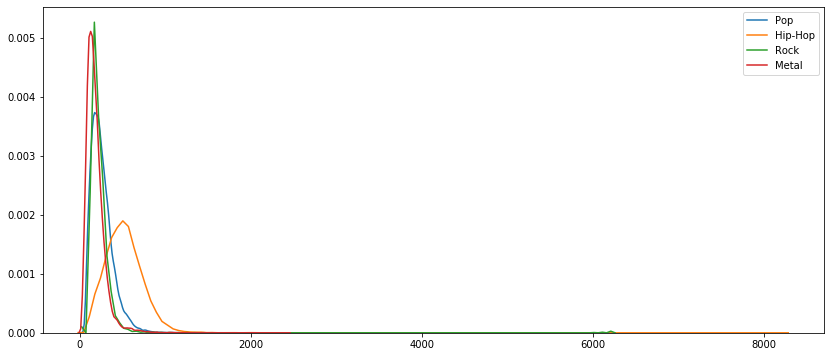

In [236]:
plt.figure(figsize=(14,6))

unique_vals = df['genre'].unique()
targets = [df.loc[df['genre'] == val] for val in unique_vals]
targets1 = targets[:4]
targets2 = targets[4:]

for target in targets1:
    sns.distplot(target[['word_count']], hist=False, label=target['genre'].values[0])

plt.show()

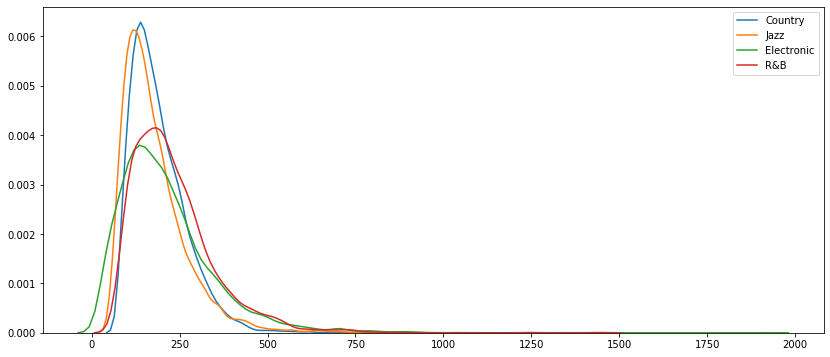

In [237]:
plt.figure(figsize=(14,6))

for target in targets2:
    sns.distplot(target[['word_count']], hist=False, label=target['genre'].values[0])

plt.show()

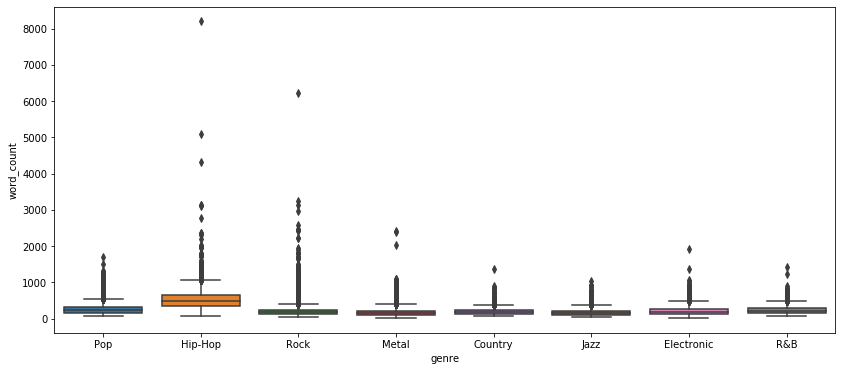

In [238]:
plt.figure(figsize=(14,6))
sns.boxplot(x="genre", y="word_count", data=df)

OPTIONAL: TOP 3 MOST FREQUENT WORDS (EXCLUDING STOPWORDS AND INTERPUNCTION)

### Song Title Clean-up (Removing dashes and Capitalizing)

In [239]:
def clean_song_names(titles_list):
    
    no_dot = list(map(lambda item: item.replace(".", ""), titles_list))
    no_dash = list(map(lambda item: item.replace("-", " "), no_dot))
    return list(map(lambda item: string.capwords(item), no_dash))

In [240]:
final_titles = clean_song_names(df.song)
df['song'] = final_titles
print(df.shape)
df.head()

(206714, 6)


,song,year,artist,genre,lyrics,word_count
index,,,,,,
0,Ego Remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",433
1,Then Tell Me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",258
2,Honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,170
3,You Are My Rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",522
4,Black Culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312


In [269]:
df['lyrics'].loc[0]

"Oh baby, how you doing?\nYou know I'm gonna cut right to the chase\nSome women were made but me, myself\nI like to think that I was created for a special purpose\nYou know, what's more special than you? You feel me\nIt's on baby, let's get lost\nYou don't need to call into work 'cause you're the boss\nFor real, want you to show me how you feel\nI consider myself lucky, that's a big deal\nWhy? Well, you got the key to my heart\nBut you ain't gonna need it, I'd rather you open up my body\nAnd show me secrets, you didn't know was inside\nNo need for me to lie\nIt's too big, it's too wide\nIt's too strong, it won't fit\nIt's too much, it's too tough\nHe talk like this 'cause he can back it up\nHe got a big ego, such a huge ego\nI love his big ego, it's too much\nHe walk like this 'cause he can back it up\nUsually I'm humble, right now I don't choose\nYou can leave with me or you could have the blues\nSome call it arrogant, I call it confident\nYou decide when you find on what I'm working 

### Balancing the genre distribution

In [241]:
def get_sample(df, n=df['genre'].value_counts().min()):
    
    genres = list(set(df['genre']))
    indexes = []
    sample_indexes = []
    
    for genre in genres:
        
        indexes = df.index[df['genre'] == genre]
        sample = np.random.choice(indexes, n, replace=False)
        sample_indexes.append(sample)

    return [item for sublist in sample_indexes for item in sublist]

In [242]:
indexes = get_sample(df)
df = df.loc[df.index.isin(indexes)]
df.genre.value_counts()

R&B           3255
Rock          3255
Pop           3255
Electronic    3255
Country       3255
Metal         3255
Jazz          3255
Hip-Hop       3255
Name: genre, dtype: int64

In [248]:
# df.reset_index(inplace = True)
df.drop(columns = ["level_0", "index"], axis = 1, inplace = True)
df.head()

C:\Users\lidij\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,song,year,artist,genre,lyrics,word_count
0,No Broken Hearted Girl,2009,beyonce-knowles,Pop,Youre everything I thought you never were\nAnd...,468
1,Standing On The Sun,2013,beyonce-knowles,Pop,My body is magnified\nIn the sun set me alight...,421
2,Rise Up,2013,beyonce-knowles,Pop,I'm the matriarch of your land OH\nWhen you ne...,341
3,Jealous,2013,beyonce-knowles,Pop,[Verse 1]\nI'm in my penthouse half naked\nI c...,264
4,Everything I Do,2006,beyonce-knowles,Pop,Every step I make\nAnd every breath I take\nI ...,281


In [249]:
df.to_csv('clean_data.csv')

### Normality attempt

In [2]:
# from scipy import stats
# from sklearn import preprocessing

In [1]:
# def test_normality(genres = list(set(df['genre']))):
    
#     min_max_scaler = preprocessing.MinMaxScaler()
    
#     for genre in genres:
        
#         x_initial = np.array(df['word_count'][df['genre'] == genre].values)
#         x_initial = x_initial.reshape(len(x_initial), 1)
#         x = min_max_scaler.fit_transform(x_initial)
#         print(x.ravel())
#         k2, p = stats.normaltest(x.ravel())
#         alpha = 1e-3
#         print("p = {:g}".format(p))
#         print(genre)
        
#         if p < alpha:  # null hypothesis: x comes from a normal distribution
#             print("The null hypothesis can be rejected")
#         else:
#             print("The null hypothesis cannot be rejected")
#         return x